### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Keras and Tensorflow >2.0

In [2]:
# ### Data Collection
# import pandas_datareader as pdr
# key=""

In [3]:
# df = pdr.get_data_tiingo('AAPL', api_key=key)

In [4]:
# df.to_csv('AAPL.csv')

In [5]:
import pandas as pd
data = pd.read_csv("g3.csv")

In [6]:
df=pd.DataFrame(data)


In [7]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,1/12/2015,"1,232.80","1,223.00","1,236.00","1,217.50",138.52K,1.37%
1,1/13/2015,"1,234.40","1,233.10","1,244.50","1,227.40",179.65K,0.13%
2,1/14/2015,"1,234.50","1,231.20","1,244.60","1,224.90",193.11K,0.01%
3,1/15/2015,"1,264.80","1,229.70","1,267.20","1,226.10",288.79K,2.45%
4,1/16/2015,"1,276.90","1,263.50","1,282.40","1,255.20",219.41K,0.96%
...,...,...,...,...,...,...,...
1999,10/28/2022,"1,644.80","1,667.20","1,670.90","1,640.70",196.36K,-0.93%
2000,10/31/2022,"1,640.70","1,647.20","1,648.50","1,634.50",128.41K,-0.25%
2001,11/1/2022,"1,649.70","1,636.10","1,660.30","1,633.60",197.98K,0.55%
2002,11/2/2022,"1,650.00","1,651.40","1,673.10","1,637.40",220.93K,0.02%


In [8]:
df= df[["Date","Price"]]

In [9]:
df.head()

,Date,Price
0,1/12/2015,"1,232.80"
1,1/13/2015,"1,234.40"
2,1/14/2015,"1,234.50"
3,1/15/2015,"1,264.80"
4,1/16/2015,"1,276.90"


In [10]:
df.tail()

,Date,Price
1999,10/28/2022,"1,644.80"
2000,10/31/2022,"1,640.70"
2001,11/1/2022,"1,649.70"
2002,11/2/2022,"1,650.00"
2003,11/3/2022,"1,630.90"


In [11]:
df.isnull().sum()

Date     0
Price    0
dtype: int64

In [12]:
df1 = df['Price'].astype(str).str.replace(r'[^0-9.]', '', regex=True).replace('', '0').fillna(0).astype(float).reset_index(drop=True)


In [13]:
df1

0       1232.8
1       1234.4
2       1234.5
3       1264.8
4       1276.9
         ...  
1999    1644.8
2000    1640.7
2001    1649.7
2002    1650.0
2003    1630.9
Name: Price, Length: 2004, dtype: float64

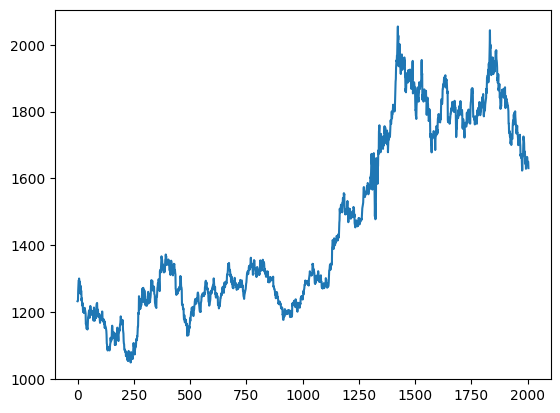

In [14]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [15]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [16]:
import numpy as np

In [17]:
df1

0       1232.8
1       1234.4
2       1234.5
3       1264.8
4       1276.9
         ...  
1999    1644.8
2000    1640.7
2001    1649.7
2002    1650.0
2003    1630.9
Name: Price, Length: 2004, dtype: float64

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [19]:
print(df1)

[[0.18228856]
 [0.1838806 ]
 [0.1839801 ]
 ...
 [0.59711443]
 [0.59741294]
 [0.57840796]]


In [20]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [21]:
test_data

array([[0.54865672],
       [0.55641791],
       [0.56497512],
       [0.59253731],
       [0.62079602],
       [0.59442786],
       [0.5878607 ],
       [0.58995025],
       [0.51452736],
       [0.54248756],
       [0.5918408 ],
       [0.59044776],
       [0.61532338],
       [0.61970149],
       [0.62298507],
       [0.60766169],
       [0.58975124],
       [0.53800995],
       [0.46477612],
       [0.43472637],
       [0.47383085],
       [0.42616915],
       [0.42756219],
       [0.43283582],
       [0.51542289],
       [0.6081592 ],
       [0.58089552],
       [0.59860697],
       [0.57253731],
       [0.58457711],
       [0.53701493],
       [0.5318408 ],
       [0.57820896],
       [0.58507463],
       [0.63124378],
       [0.6199005 ],
       [0.62139303],
       [0.68686567],
       [0.69671642],
       [0.70597015],
       [0.67661692],
       [0.66975124],
       [0.63800995],
       [0.65054726],
       [0.62557214],
       [0.67442786],
       [0.68039801],
       [0.671

In [22]:
training_size,test_size

(1302, 702)

In [23]:
train_data

array([[0.18228856],
       [0.1838806 ],
       [0.1839801 ],
       ...,
       [0.5240796 ],
       [0.53154229],
       [0.55124378]])

In [24]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
print(X_train.shape), print(y_train.shape)

(1101, 200)
(1101,)


(None, None)

In [27]:
print(X_test.shape), print(ytest.shape)

(501, 200)
(501,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [29]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [30]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(200,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


C:\Users\fahad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 200, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 200, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 15s 349ms/step - loss: 0.0267 - val_loss: 0.0650
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 352ms/step - loss: 0.0031 - val_loss: 0.0138
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 335ms/step - loss: 0.0014 - val_loss: 0.0065
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 286ms/step - loss: 9.6844e-04 - val_loss: 0.0030
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - loss: 8.9622e-04 - val_loss: 0.0020
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 383ms/step - loss: 8.9097e-04 - val_loss: 0.0029
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 417ms/step - loss: 8.1544e-04 - val_loss: 0.0026
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 388ms/step - loss: 8.2579e-04 - val_loss: 0.0031
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 7.5670e-04 - val_loss: 0.0053
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 321ms/step - loss: 6.7903e-04 - val_loss: 0.0043
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 329ms/step - loss: 6.9813e-04 - val_loss: 0.0048
Epoch 12

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.18.0'

In [36]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step


In [37]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [38]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1294.8018935014284

In [39]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

1794.404325753242

In [41]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

ValueError: could not broadcast input array from shape (501,1) into shape (701,1)

In [42]:
len(test_data)

702

In [43]:
test_data

array([[0.54865672],
       [0.55641791],
       [0.56497512],
       [0.59253731],
       [0.62079602],
       [0.59442786],
       [0.5878607 ],
       [0.58995025],
       [0.51452736],
       [0.54248756],
       [0.5918408 ],
       [0.59044776],
       [0.61532338],
       [0.61970149],
       [0.62298507],
       [0.60766169],
       [0.58975124],
       [0.53800995],
       [0.46477612],
       [0.43472637],
       [0.47383085],
       [0.42616915],
       [0.42756219],
       [0.43283582],
       [0.51542289],
       [0.6081592 ],
       [0.58089552],
       [0.59860697],
       [0.57253731],
       [0.58457711],
       [0.53701493],
       [0.5318408 ],
       [0.57820896],
       [0.58507463],
       [0.63124378],
       [0.6199005 ],
       [0.62139303],
       [0.68686567],
       [0.69671642],
       [0.70597015],
       [0.67661692],
       [0.66975124],
       [0.63800995],
       [0.65054726],
       [0.62557214],
       [0.67442786],
       [0.68039801],
       [0.671

In [44]:
x_input=test_data[502:].reshape(1,-1)
x_input.shape


(1, 200)

In [45]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [46]:
temp_input

[0.7398009950248754,
 0.7325373134328357,
 0.7426865671641791,
 0.7474626865671641,
 0.7561194029850746,
 0.7498507462686568,
 0.7534328358208955,
 0.767363184079602,
 0.7733333333333332,
 0.7820895522388058,
 0.7828855721393035,
 0.7875621890547262,
 0.8146268656716418,
 0.8014925373134327,
 0.8168159203980099,
 0.8471641791044775,
 0.8449751243781094,
 0.8535323383084579,
 0.8525373134328358,
 0.8555223880597016,
 0.8714427860696519,
 0.8338308457711441,
 0.846865671641791,
 0.8897512437810944,
 0.8683582089552238,
 0.8818905472636815,
 0.9124378109452735,
 0.9415920398009952,
 0.9887562189054724,
 0.9339303482587065,
 0.9460696517412936,
 0.9307462686567163,
 0.9066666666666665,
 0.8757213930348258,
 0.8553233830845772,
 0.8891542288557215,
 0.875323383084577,
 0.8755223880597014,
 0.8675621890547263,
 0.8832835820895522,
 0.9080597014925373,
 0.9000995024875622,
 0.8857711442786069,
 0.8583084577114428,
 0.8820895522388059,
 0.8970149253731341,
 0.8669651741293534,
 0.8766169154228

In [49]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=199
i=0
while(i<10):
    
    if(len(temp_input)>199):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.73253731 0.74268657 0.74746269 0.7561194  0.74985075 0.75343284
 0.76736318 0.77333333 0.78208955 0.78288557 0.78756219 0.81462687
 0.80149254 0.81681592 0.84716418 0.84497512 0.85353234 0.85253731
 0.85552239 0.87144279 0.83383085 0.84686567 0.88975124 0.86835821
 0.88189055 0.91243781 0.94159204 0.98875622 0.93393035 0.94606965
 0.93074627 0.90666667 0.87572139 0.85532338 0.88915423 0.87532338
 0.87552239 0.86756219 0.88328358 0.9080597  0.9000995  0.88577114
 0.85830846 0.88208955 0.89701493 0.86696517 0.87661692 0.87014925
 0.86577114 0.88069652 0.88835821 0.89104478 0.91900498 0.92766169
 0.91800995 0.92935323 0.90218905 0.89880597 0.89134328 0.87761194
 0.83950249 0.84766169 0.8320398  0.83751244 0.85781095 0.80995025
 0.81691542 0.81512438 0.82199005 0.82905473 0.80497512 0.78746269
 0.8000995  0.77114428 0.75482587 0.76059701 0.76547264 0.76248756
 0.78766169 0.78855721 0.79422886 0.81174129 0.79273632 0.79402985
 0.80039801 0.79482587 0.79164179 0.79223881 0.814

In [50]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [51]:
import matplotlib.pyplot as plt

In [52]:
len(df1)

2004

ValueError: x and y must have same first dimension, but have shapes (100,) and (3336, 1)

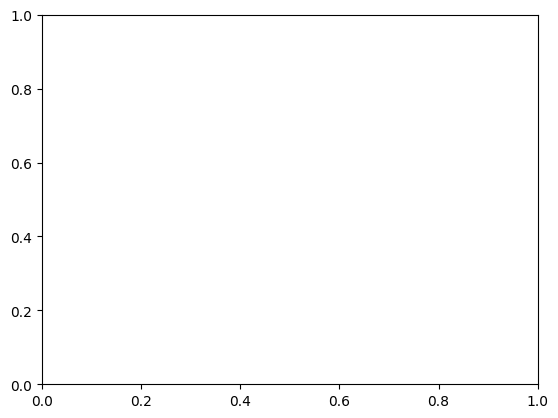

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

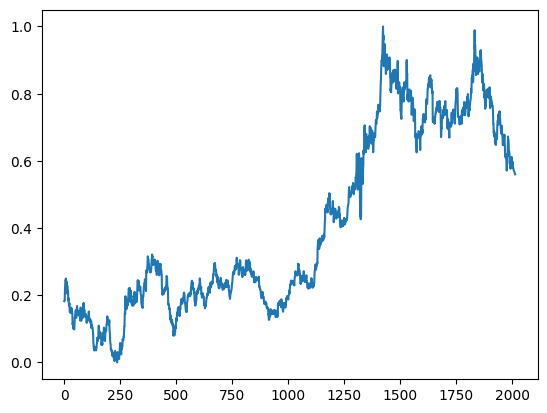

In [54]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3)

In [55]:
df3=scaler.inverse_transform(df3).tolist()

In [56]:
df3 = pd.DataFrame(df3)

In [ ]:
df3.tail(40)

,0
1974,1645.300000
1975,1623.600000
1976,1626.500000
1977,1660.300000
1978,1663.600000
1979,1667.200000
1980,1697.200000
1981,1725.500000
1982,1715.600000
1983,1715.500000


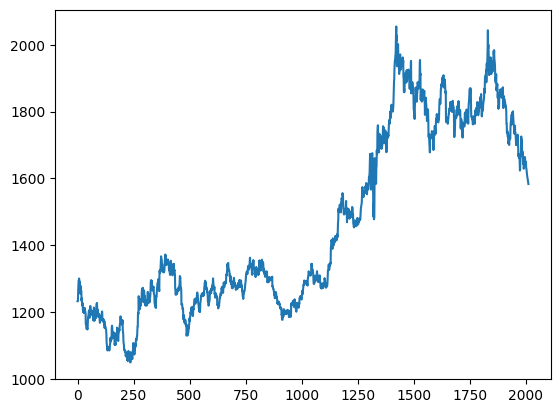

In [ ]:
plt.plot(df3)

In [67]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
sequence = np.array([10, 20, 30, 40, 50, 60])
scaler = MinMaxScaler(feature_range=(0, 1))
sequence = scaler.fit_transform(sequence.reshape(-1, 1)).flatten()  # Normalize the data

# Define the input sequence and target
X = []
y = []

# We use a window of size 3 to predict the next number
window_size = 3
for i in range(len(sequence) - window_size):
    X.append(sequence[i:i + window_size])
    y.append(sequence[i + window_size])

# Convert lists to numpy arrays and reshape for LSTM input
X = np.array(X)
y = np.array(y)
X = X.reshape((X.shape[0], X.shape[1], 1))  # Reshape to (samples, time steps, features)

# Build the LSTM model
model = Sequential()
model.add(Input(shape=(X.shape[1], X.shape[2])))  # Define input shape with an Input layer
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=200, verbose=50)

# Prepare the test input (last three values of the sequence)
test_input = np.array([40, 50, 60])
test_input = scaler.transform(test_input.reshape(-1, 1)).flatten()
test_input = test_input.reshape((1, window_size, 1))

# Predict the next value
predicted_value = model.predict(test_input, verbose=0)
predicted_value = scaler.inverse_transform(predicted_value)[0][0]  # Rescale to original value

print(f"The next number in the sequence is approximately: {predicted_value:.2f}")


Epoch 1/200
Epoch 2/200
Epoch 3/200
Epoch 4/200
Epoch 5/200
Epoch 6/200
Epoch 7/200
Epoch 8/200
Epoch 9/200
Epoch 10/200
Epoch 11/200
Epoch 12/200
Epoch 13/200
Epoch 14/200
Epoch 15/200
Epoch 16/200
Epoch 17/200
Epoch 18/200
Epoch 19/200
Epoch 20/200
Epoch 21/200
Epoch 22/200
Epoch 23/200
Epoch 24/200
Epoch 25/200
Epoch 26/200
Epoch 27/200
Epoch 28/200
Epoch 29/200
Epoch 30/200
Epoch 31/200
Epoch 32/200
Epoch 33/200
Epoch 34/200
Epoch 35/200
Epoch 36/200
Epoch 37/200
Epoch 38/200
Epoch 39/200
Epoch 40/200
Epoch 41/200
Epoch 42/200
Epoch 43/200
Epoch 44/200
Epoch 45/200
Epoch 46/200
Epoch 47/200
Epoch 48/200
Epoch 49/200
Epoch 50/200
Epoch 51/200
Epoch 52/200
Epoch 53/200
Epoch 54/200
Epoch 55/200
Epoch 56/200
Epoch 57/200
Epoch 58/200
Epoch 59/200
Epoch 60/200
Epoch 61/200
Epoch 62/200
Epoch 63/200
Epoch 64/200
Epoch 65/200
Epoch 66/200
Epoch 67/200
Epoch 68/200
Epoch 69/200
Epoch 70/200
Epoch 71/200
Epoch 72/200
Epoch 73/200
Epoch 74/200
Epoch 75/200
Epoch 76/200
Epoch 77/200
Epoch 78

In [ ]:
# stock_price_prediction.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Load dataset

data = pd.read_csv("XAU.csv")  # Replace with your dataset





In [12]:
data = data[["Date" , "Price"]]
df = pd.DataFrame(data)


In [13]:
data["Price"] = data["Price"].replace(',', '', regex=True).astype(float)
close_prices = data["Price"].values.reshape(-1, 1)

In [14]:
close_prices

array([[1692.4 ],
       [1696.4 ],
       [1693.65],
       ...,
       [2561.24],
       [2571.45],
       [2588.98]])

Epoch 1/100


C:\Users\fahad\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0062
Epoch 2/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 3.8783e-04
Epoch 3/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 3.1872e-04
Epoch 4/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 2.9851e-04
Epoch 5/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.8552e-04
Epoch 6/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 2.4228e-04
Epoch 7/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2855e-04
Epoch 8/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.2578e-04
Epoch 9/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 2.2364e-04
Epoch 10/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 1.8783e-04
Epoch 11/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - loss: 2.1186e-04
Epoch 12/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 1.6062e-04
Epoch 13/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 1.8204e-04
Epoch 14/100
78/78 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 1.9870e-04
Epoch 15/100
78/7

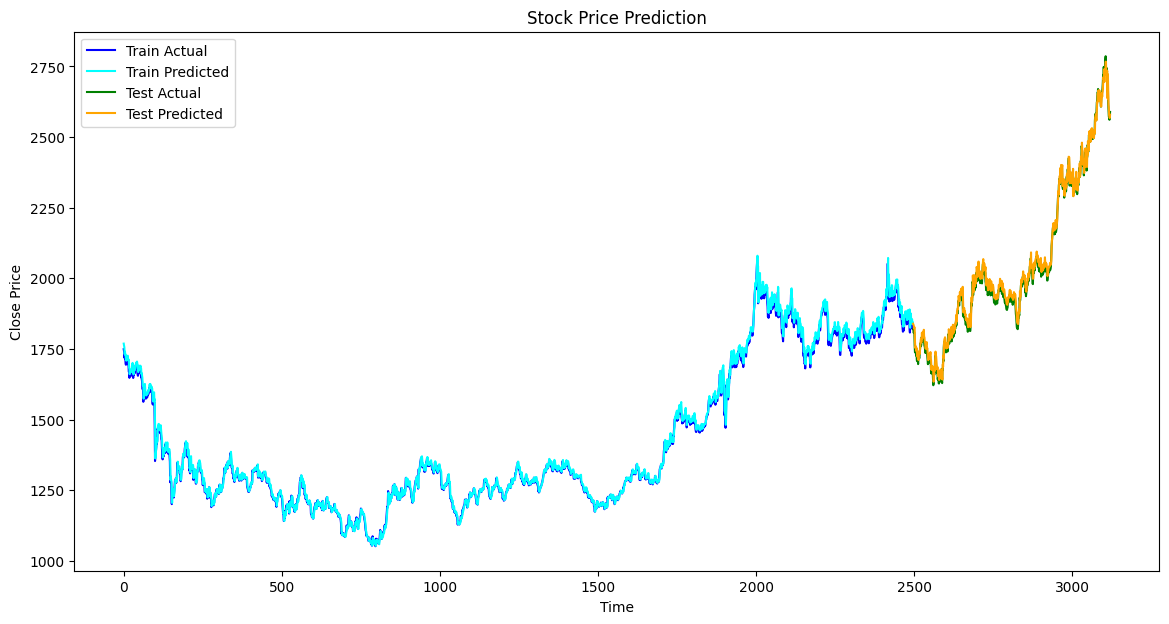

In [16]:



# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 60  # Using 60 time steps
X, y = create_sequences(scaled_data, time_steps)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

# Predict
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Reverse scaling
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot
plt.figure(figsize=(14, 7))
plt.plot(np.arange(len(y_train_actual)), y_train_actual, label="Train Actual", color="blue")
plt.plot(np.arange(len(y_train_actual)), train_predictions, label="Train Predicted", color="cyan")
plt.plot(np.arange(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), y_test_actual, label="Test Actual", color="green")
plt.plot(np.arange(len(y_train_actual), len(y_train_actual) + len(y_test_actual)), test_predictions, label="Test Predicted", color="orange")
plt.title("Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


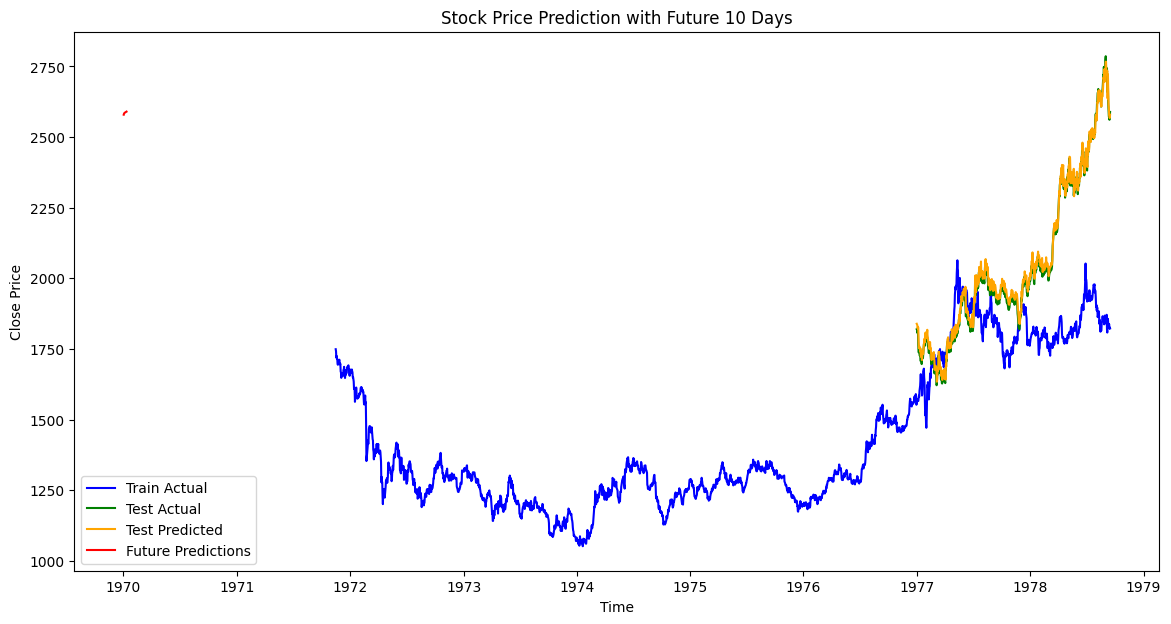

Future Predictions:
                           Date  Predicted_Close
0 1970-01-02 00:00:00.000003179      2579.221191
1 1970-01-03 00:00:00.000003179      2582.798828
2 1970-01-04 00:00:00.000003179      2584.764160
3 1970-01-05 00:00:00.000003179      2585.885010
4 1970-01-06 00:00:00.000003179      2586.677979
5 1970-01-07 00:00:00.000003179      2587.380127
6 1970-01-08 00:00:00.000003179      2588.075439
7 1970-01-09 00:00:00.000003179      2588.772949
8 1970-01-10 00:00:00.000003179      2589.455811
9 1970-01-11 00:00:00.000003179      2590.101562


In [17]:
# Predict next 10 days
future_steps = 10
last_sequence = X_test[-1]  # Start from the last sequence in test data
future_predictions = []
for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(next_pred[0, 0])
    # Update the sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Reverse scaling for future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Prepare DataFrame for future predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Close": future_predictions.flatten()
})

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_train_actual):], y_train_actual, label="Train Actual", color="blue")
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Test Actual", color="green")
plt.plot(data.index[-len(y_test_actual):], test_predictions, label="Test Predicted", color="orange")
plt.plot(future_dates, future_predictions, label="Future Predictions", color="red")
plt.title("Stock Price Prediction with Future 10 Days")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Display predictions in a DataFrame
print("Future Predictions:")
print(future_df)

In [41]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol for EUR/USD
ticker = "ABL.KA"

# Fetch data
data = yf.download(ticker, interval="1D", period="1mo")
  # Adjust period as needed
data.tail(15)
data.to_excel("a.xlsx")
# # Display data
# data = data[["Close"]]
# data.drop("Dat")
# data.to_excel("EUR.xlsx")
# # Save to CSV if needed
# # data.to_csv("EUR_USD_1hr_data.csv")
# print("Data saved to 'EUR_USD_1hr_data.csv'.")


[*********************100%***********************]  1 of 1 completed


In [25]:
# stock_price_prediction_with_future.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset
data = pd.read_excel("h.xlsx")  # Replace with your dataset
data["Price"] = data["Price"].replace(',', '', regex=True).astype(float)  # Clean and convert 'Close' column
close_prices = data["Price"].values.reshape(-1, 1)

# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# Create sequences
def create_sequences(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 250  # Using 60 time steps
X, y = create_sequences(scaled_data, time_steps)

# Split into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_steps, 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)

# Train the model
model.fit(
    X_train, y_train, 
    batch_size=32, 
    epochs=100, 
    verbose=1, 
    callbacks=[early_stopping]
)

# Predict for training and testing data
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Reverse scaling for predictions
train_predictions = scaler.inverse_transform(train_predictions)
test_predictions = scaler.inverse_transform(test_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

# Predict next 10 days
future_steps = 10
last_sequence = X_test[-1]  # Start from the last sequence in test data
future_predictions = []

for _ in range(future_steps):
    # Predict the next value
    next_pred = model.predict(last_sequence.reshape(1, time_steps, 1))
    future_predictions.append(next_pred[0, 0])
    # Update the sequence with the new prediction
    last_sequence = np.append(last_sequence[1:], next_pred, axis=0)

# Reverse scaling for future predictions
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Prepare DataFrame for future predictions
future_dates = pd.date_range(start=data.index[-1], periods=future_steps + 1, freq='D')[1:]
future_df = pd.DataFrame({
    "Date": future_dates,
    "Predicted_Close": future_predictions.flatten()
})

# Plot results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_train_actual):], y_train_actual, label="Train Actual", color="blue")
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label="Test Actual", color="green")
plt.plot(data.index[-len(y_test_actual):], test_predictions, label="Test Predicted", color="orange")
plt.plot(future_dates, future_predictions, label="Future Predictions", color="red")
plt.title("Stock Price Prediction with Future 10 Days")
plt.xlabel("Time")
plt.ylabel("Close Price")
plt.legend()
plt.show()

# Display predictions in a DataFrame
print("Future Predictions:")
print(future_df)


AttributeError: module 'scipy.sparse' has no attribute 'linalg'

In [ ]:
import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Example tickers

# Date range for historical data
start_date = '2008-01-01'
end_date = '2024-12-31'

# Function to fetch and clean data for a single ticker
def fetch_and_clean_data(ticker):
    try:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Reset index to make 'Date' a column
        data.reset_index(inplace=True)

        # Add a 'Ticker' column
        data['Ticker'] = ticker

        # Keep only the necessary columns
        data = data[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Loop through all tickers and fetch, clean, and save the data
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    
    # Fetch and clean data
    clean_data = fetch_and_clean_data(ticker)
    
    # Save to CSV if data was successfully fetched
    if clean_data is not None:
        filename = f"{ticker}_cleaned_data.csv"
        clean_data.to_csv(filename, index=False)
        print(f"Data for {ticker} saved to {filename}")
    else:
        print(f"No data found for {ticker}.")

print("Data extraction and saving complete!")


Fetching data for OGDC.KA...


[*********************100%***********************]  1 of 1 completed


Data for OGDC.KA saved to OGDC.KA_20_years.csv
Fetching data for HBL.KA...


[*********************100%***********************]  1 of 1 completed


Data for HBL.KA saved to HBL.KA_20_years.csv
Fetching data for PSO.KA...


[*********************100%***********************]  1 of 1 completed


Data for PSO.KA saved to PSO.KA_20_years.csv
Fetching data for FFC.KA...


[*********************100%***********************]  1 of 1 completed


Data for FFC.KA saved to FFC.KA_20_years.csv
Fetching data for LUCK.KA...


[*********************100%***********************]  1 of 1 completed

Data for LUCK.KA saved to LUCK.KA_20_years.csv
Data fetching and saving complete.


In [51]:
import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Example tickers

# Date range for historical data
start_date = '2008-01-01'
end_date = '2024-12-31'

# Function to fetch, clean, and save data for a single ticker
def fetch_and_save_data(ticker):
    try:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)

        # Reset index to make 'Date' a column
        data.reset_index(inplace=True)

        # Add a 'Ticker' column
        data['Ticker'] = ticker

        # Select and reorder necessary columns
        data = data[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

        # Save the cleaned data to a CSV file without header issues
        filename = f"{ticker}_cleaned_data.csv"
        data.to_csv(filename, index=False, header=True)
        
        print(f"Data for {ticker} saved to {filename}")
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")

# Loop through all tickers and fetch data
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    fetch_and_save_data(ticker)

print("Data fetching and saving complete!")


Fetching data for AAPL...


[*********************100%***********************]  1 of 1 completed


Data for AAPL saved to AAPL_cleaned_data.csv
Fetching data for MSFT...


[*********************100%***********************]  1 of 1 completed


Data for MSFT saved to MSFT_cleaned_data.csv
Fetching data for GOOG...


[*********************100%***********************]  1 of 1 completed


Data for GOOG saved to GOOG_cleaned_data.csv
Fetching data for AMZN...


[*********************100%***********************]  1 of 1 completed


Data for AMZN saved to AMZN_cleaned_data.csv
Fetching data for TSLA...


[*********************100%***********************]  1 of 1 completed

Data for TSLA saved to TSLA_cleaned_data.csv
Data fetching and saving complete!


import yfinance as yf
import pandas as pd

# List of tickers
tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'TSLA']  # Example tickers

# Date range for historical data
start_date = '2008-01-01'
end_date = '2024-12-31'

# Function to fetch and clean data for a single ticker
def fetch_and_clean_data(ticker):
    try:
        # Fetch historical data
        data = yf.download(ticker, start=start_date, end=end_date)
        
        # Reset index to make 'Date' a column
        data.reset_index(inplace=True)

        # Add a 'Ticker' column
        data['Ticker'] = ticker

        # Keep only the necessary columns
        data = data[['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume']]

        return data
    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None

# Loop through all tickers and fetch, clean, and save the data
for ticker in tickers:
    print(f"Fetching data for {ticker}...")
    
    # Fetch and clean data
    clean_data = fetch_and_clean_data(ticker)
    
    # Save to CSV if data was successfully fetched
    if clean_data is not None:
        filename = f"{ticker}_cleaned_data.csv"
        clean_data.to_csv(filename, index=False)
        print(f"Data for {ticker} saved to {filename}")
    else:
        print(f"No data found for {ticker}.")

print("Data extraction and saving complete!")
